


# 625 Fall 2023 : Homework 4, Coding

There are five sections below, corresponding to three coding assignments. Implement and test (note that Problem 11 is a no-credit exercise).


# Problem 5 : Infogain



In [1]:
'''
PROBLEM 5

- implement the functions in this code cell for problem 6.

'''

import math
import numpy as np

#--------------------------
# my_log function: implement this and use it in entropy()
#--------------------------
def my_log(val):
  # must take care of the val=0 case.
  # - right now it will cause an error when my_log(0) is called.
  if val == 0:
      return 0
  else:
      return math.log2(val)


#--------------------------
# entropy function: implement this and use it in infogain()
#--------------------------
def entropy(pos_neg):
  '''
  implement this

  input:
  pos_neg is a list  [n, m], where
  n is the number of positive samples, and
  m is the number of negative samples

  returns:
  entropy value

  '''

  pos = pos_neg[0]
  neg = pos_neg[1]
  total = pos + neg
  prob_pos = pos / total if pos else 0
  prob_neg = neg / total if neg else 0
  return -(prob_pos * my_log(prob_pos) + prob_neg * my_log(prob_neg))
  #prob_pos = pos/(pos+neg)
  #prob_neg = 1-prob_pos

  #print('entropy()')
  #print(' prob_pos = '+str(prob_pos))
  # compute entropy
  # ...
  # ...
  # return ....

#--------------------------
# infogain function: define this and test
#--------------------------
def infogain (before, after):
  '''
  implement this

  input:
    before: [n, m], for pos# and neg#
    after: [[n1, m1], [n2, m2], [n3, m3], ... ],
      for pos# and neg# for the different splits.
    * example:
      before = [6,6]
      after  = [ [0,2], [4,0], [2,4] ]

  returns: infogain value
  '''

  #print('infogain()')

  # 1. entropy before split
  entropy_before = entropy(before)
  #print(entropy(before))
  # 2. entropy after split
  entropy_after = 0
  total = sum(before)
  for split in after:
    #
    split_entropy = entropy(split)
    split_total = sum(split)
    entropy_after += (split_total / total) * split_entropy

  # 3. compute infogaion from 1 and 2 above
  gain = entropy_before - entropy_after

  # 4. return
  return gain

#--------------------------
# test entropy
#--------------------------
print(entropy([10,10]))
print(entropy([2,5]))
#--------------------------
# test infogain
#--------------------------
pre = [6,6]
post  = [ [0,2], [4,0], [2,4] ]
print('\n\n')
print(infogain(pre, post))

1.0
0.863120568566631



0.5408520829727552


In [2]:
# Add your test code here, for the homework questions
print("Information gain for B")
print("Entropy [6, 8]: ", entropy([6, 8]))
print("Entropy [4, 2]: ", entropy([4, 2]))
print("Entropy [2, 6]: ", entropy([2, 6]))

pre_split = [6, 8]
post_split = [[4, 2], [2, 6]]
print("Information Gain: ", infogain(pre_split, post_split))

print("Information gain for C")
print("Entropy [6, 8]: ", entropy([6, 8]))
print("Entropy [4, 0]: ", entropy([4, 0]))
print("Entropy [2, 10]: ", entropy([2, 10]))

pre_split = [6, 8]
post_split = [[4, 0], [2, 10]]
print("Information Gain: ", infogain(pre_split, post_split))

print("Information gain for E")
print("Entropy [6, 8]: ", entropy([6, 8]))
print("Entropy [4, 3]: ", entropy([4, 3]))
print("Entropy [2, 5]: ", entropy([2, 5]))

pre_split = [6, 8]
post_split = [[4, 3], [2, 5]]
print("Information Gain: ", infogain(pre_split, post_split))

Information gain for B
Entropy [6, 8]:  0.9852281360342515
Entropy [4, 2]:  0.9182958340544896
Entropy [2, 6]:  0.8112781244591328
Information Gain:  0.12808527889139443
Information gain for C
Entropy [6, 8]:  0.9852281360342515
Entropy [4, 0]:  -0.0
Entropy [2, 10]:  0.6500224216483541
Information Gain:  0.4280660603356623
Information gain for E
Entropy [6, 8]:  0.9852281360342515
Entropy [4, 3]:  0.9852281360342515
Entropy [2, 5]:  0.863120568566631
Information Gain:  0.06105378373381021


# Problem 6 : Decision Tree


Novel input 1 prediction: NO
Novel input 2 prediction: YES


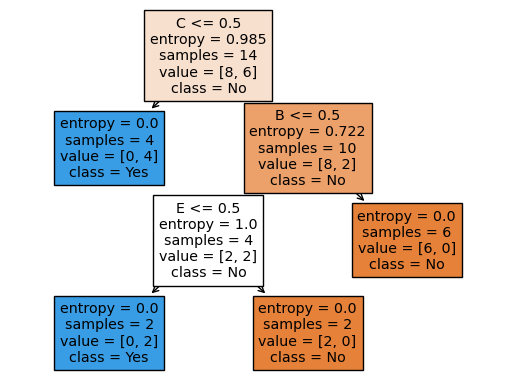

In [3]:
# Testing scikit-learn's decision tree implementation.
#
#  - scikit-learn's decision tree only allows binary target values.

from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt

clf = tree.DecisionTreeClassifier(criterion="entropy")

# Enter your data here. Each row is an instance. Each column is the attribute.
# Set the first attribute value that appears in the table to be 0, and the next one as 1.
# - for example, for the Commute attribute, 2hr = 0, and 1hr = 1.
#
# X = [[0,0,0,0],
#      [0,0,0,1],
#      ... .... ... ]
#

# mock data, with only 4 instances
# - MODIFY this
#
# Column order: A, B, C, D, E
# Values:         0, 1, as shown in the table.
# Target:         N=0, Y=1
#X = [[0,0,0,0],
#     [0,0,0,1],
#     [1,0,0,0],
#     [1,1,0,0] ]

# Enter the target data (AcceptJob) here. 1 = Yes. 0 = No.
# y = [1, 1, .... ]
# - MODIFY this

#y = [ 1,
#     0,
#     0,
#     0 ]

X = [
    [1, 1, 1, 0, 1],
    [1, 0, 0, 0, 0],
    [1, 1, 1, 1, 0],
    [0, 1, 1, 0, 0],
    [1, 0, 1, 0, 1],
    [0, 1, 1, 1, 1],
    [1, 1, 0, 1, 1],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 0, 1],
    [0, 1, 1, 0, 1],
    [1, 0, 1, 1, 1],
    [1, 1, 0, 1, 0],
    [1, 0, 1, 0, 0],
    [0, 0, 1, 1, 0]
]
y = [0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1]
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(X, y)

# Note: value=[a,b] means "a" negative samples, and "b" positive samples [# neg = a, # pos = b].
#       *Note that this order is reversed, compared to the lecture slides, where we had [# pos, #neg], so you have to be careful.
# Note: left branch is attribute value 0, right branch = attribute value 1.
# Note: X[n] means the attribute for the n-th column (n=0 is the first column in),
#       so, for the homework problem, X[0] is Commute. X[1] is JobType, etc.

# Note: You can use some optional arguments to match each column to an attribute name, and indicate the class.
#   - feature_names = <python list>
#   - class_names = <puython list>
#tree.plot_tree(clf)
tree.plot_tree(clf, feature_names=['A', 'B', 'C', 'D', 'E'], class_names=['No', 'Yes'], filled=True)

# Novel inputs to test
novel_inputs = [
    [0, 0, 1, 1, 1],  # Example 1
    [1, 1, 0, 0, 1]   # Example 2
]
# Use the trained classifier to predict the novel inputs
predicted_classes = clf.predict(novel_inputs)
# Print out the predictions
for i, prediction in enumerate(predicted_classes, start=1):
  if prediction == 1:
    print("Novel input", i, "prediction: YES")
  else:
    print("Novel input", i, "prediction: NO")

#report will be written in pdf file.

# Problem 7 : Perceptron



In [4]:
'''
Implement perceptron in this code cell : implement the perceptron() function

Assumptions: 2 input, 1 output perceptron.
  Note: 1 bias unit should also be added to the input vector  (fixed value of 1.0).
        This is already done in the skeleton code.
'''

import matplotlib.pyplot as plt
import random
import numpy as np
import math

# example data: AND
# -input  : [x,y] values
# -target : target values
'''
  implement this:
     add more samples, for OR, XOR, etc.
'''
input  = np.array(
          [[0,0],
          [0,1],
          [1,0],
          [1,1]])
target = np.array([
          0,
          1,
          1,
          1])

BIAS = -1.0

#-----------------------------
# plot decision boundary function
#-----------------------------
def plot_decision_boundary(W):
  '''
  plot the decision boundary for weight vector W
  - fully functional
  '''

  x = np.arange(0.0, 1.0, 0.05)
  y = np.arange(1.0, 0.0, -0.05)

  xx, yy = np.meshgrid(x, y)

  output = W[0]*xx + W[1]*yy + W[2]*BIAS

  active_output = output >= 0.0

  fig, ax = plt.subplots(1,1)

  ax.imshow(active_output, extent=[0, 1, 0, 1], origin='lower')
  plt.show()

#-----------------------------
# perceptron function: implement this
#-----------------------------
def perceptron(inp, tgt, alpha=0.01, err_target=0.001, max_epochs=1000):
  '''
  implement this

  input:
    inp : input vector array
    tgt : target output array
    alpha : learning rate, default = 0.01
    err_target : target error below which to terminate

  output: print out #epochs, error, and plot the decision boundary

  returns: Weight vector
  '''

  # compute some common sizes
  num_dat = len(tgt)
  inp_dim = len(inp[0])+1        # "+1" to add bias unit

  # add bias to input vectors
  inp = np.append(inp, BIAS*np.ones([num_dat,1]), axis=1)

  # initialize weight vector : -0.5 ~ 0.5
  W = (np.random.rand(inp_dim)-0.5)

  n = 0
  error = math.inf
  while error > err_target and n < max_epochs:

    #--------------
    # epoch
    #--------------

    # randomize input ordering
    #good for xor, uncomment it when use for xor, comment it when using and, or

    order = np.arange(num_dat)
    np.random.shuffle(order)

    # 1. go over each input

    total_error = 0.0

    for i in order: #uncomment it when using for xor
    #for i in range(num_dat): #uncommet it when using for "and", and "or"
      #commet it, too many message
      #print("Input (with bias at the end)=", end='')
      #print(inp[i], end=', Target=')
      #print(tgt[i])

      # 1.1. activate output unit
      #output = W*inp[i]
      #print("output=",output.shape)

      #computes the weighted sum of the inputs
      output = 1 if np.dot(W, inp[i]) > 0 else 0

      # 1.2. compute error
      error = tgt[i] - output

      # 1.3. adjust weight, based on the error
      W += alpha * error * inp[i]
      # 1.4. keep sum of total_error during this epoch
      # total_error = total_error + absolute value of error from 1.2
      total_error += abs(error)
    # 2. compute error for the epoch as the mean error from the current epoch
    # error = total_error / number of samples
    error = total_error / num_dat
    # increment epoch count
    n = n + 1

    # forcefully quit, for now
    #error = 0.00001

  # Done with training
  print('number of epochs = '+str(n))
  print('average error = '+str(error))

  # return weight vector
  return W,n

#-----------------------------
# test perceptron
#-----------------------------
#W = perceptron(input, target, 0.1, 0.001)

#-----------------------------
# test decision boundary plot: white = 1, black = 0
# - Note: if you get totally white of totally black, try
#     rerunnning (sometimes more than 10 times) to get a non-trivial result.
#-----------------------------
print('\n\nTesting plot_decision_boundary')
#print(W)
#plot_decision_boundary(W)

W, epochs = perceptron(input, target, 0.1, 0.001)

print("Trained weights: " ,W)
print("Number of epochs: ", epochs)
for i, inp in enumerate(input):
    # Add bias to the input
    biased_inp = np.append(inp, BIAS)
    # Calculate output using the step function
    output = 1 if np.dot(W, biased_inp) > 0 else 0
    print("Input:", inp, "Expected Output: ",target[i], "Perceptron Output: ",output)
    #plot if it needed
    #plot_decision_boundary(W)




Testing plot_decision_boundary
number of epochs = 8
average error = 0.0
Trained weights:  [0.07853803 0.10487442 0.02206491]
Number of epochs:  8
Input: [0 0] Expected Output:  0 Perceptron Output:  0
Input: [0 1] Expected Output:  1 Perceptron Output:  1
Input: [1 0] Expected Output:  1 Perceptron Output:  1
Input: [1 1] Expected Output:  1 Perceptron Output:  1


In [5]:
inp = np.append(input, BIAS*np.ones([4,1]), axis=1)

np.dot(W,inp[0])
W
inp[0]

array([ 0.,  0., -1.])

Function: AND
number of epochs = 7
average error = 0.0
  Session 1 : Epochs= 7 Weights= [0.11006898 0.09913729 0.17388762]


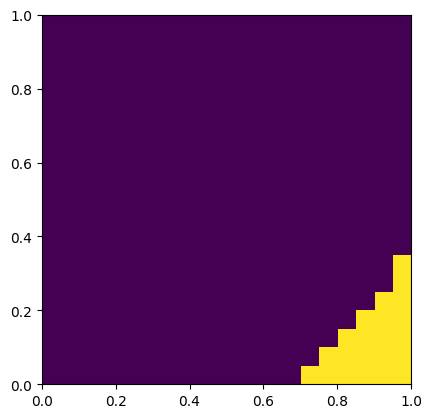

number of epochs = 9
average error = 0.0
  Session 2 : Epochs= 9 Weights= [0.13042266 0.2289817  0.35810708]


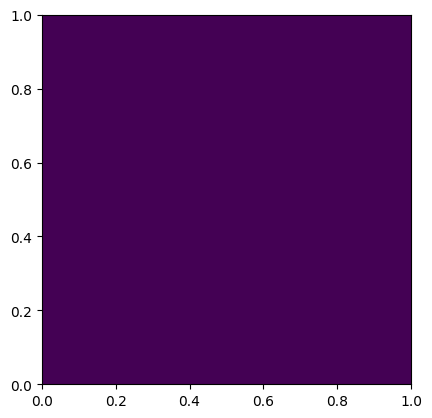

number of epochs = 9
average error = 0.0
  Session 3 : Epochs= 9 Weights= [0.26899197 0.11229375 0.29063538]


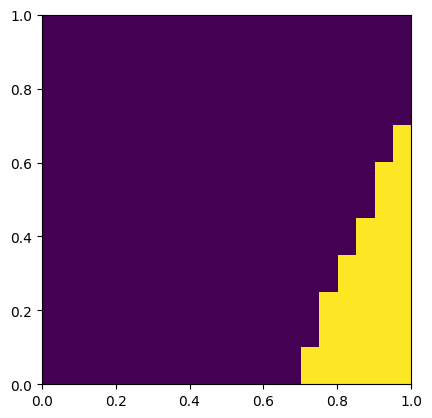

number of epochs = 4
average error = 0.0
  Session 4 : Epochs= 4 Weights= [0.29605136 0.08216892 0.30985689]


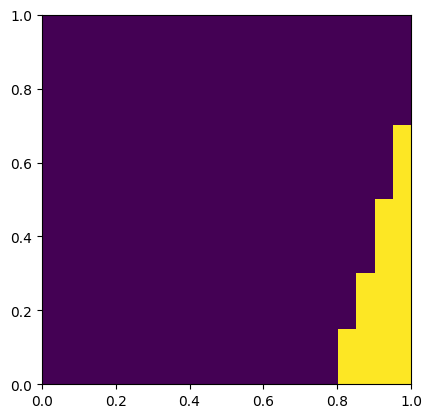

number of epochs = 7
average error = 0.0
  Session 5 : Epochs= 7 Weights= [0.03110549 0.13718022 0.16395829]


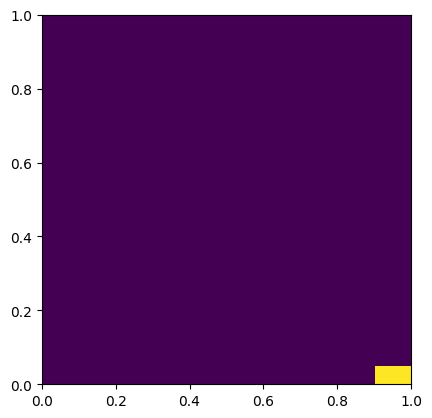

Function: OR
number of epochs = 5
average error = 0.0
  Session 1 : Epochs= 5 Weights= [0.53121721 0.00677027 0.00061614]


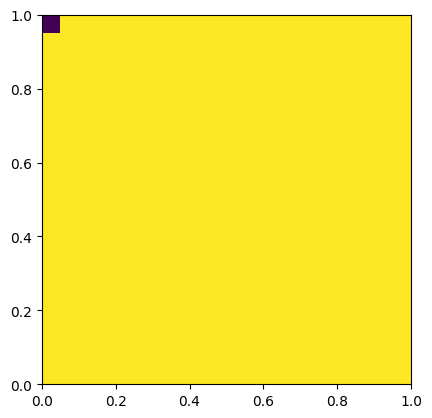

number of epochs = 3
average error = 0.0
  Session 2 : Epochs= 3 Weights= [0.53591104 0.26100587 0.16920142]


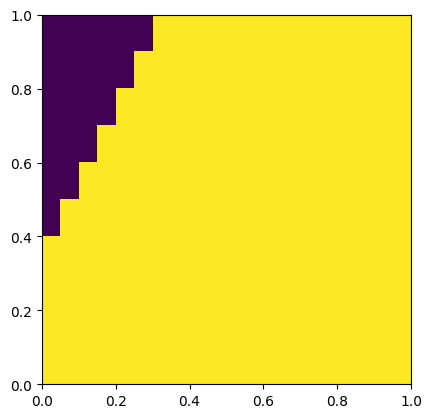

number of epochs = 5
average error = 0.0
  Session 3 : Epochs= 5 Weights= [0.10518813 0.1585957  0.0636526 ]


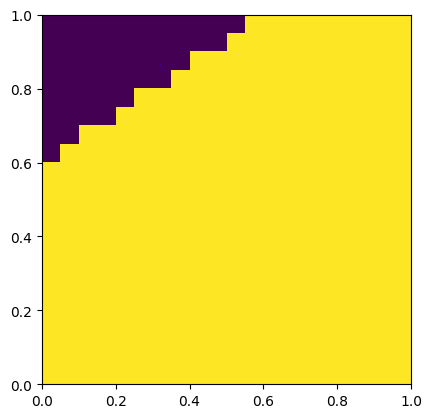

number of epochs = 5
average error = 0.0
  Session 4 : Epochs= 5 Weights= [0.09748071 0.18877072 0.00686778]


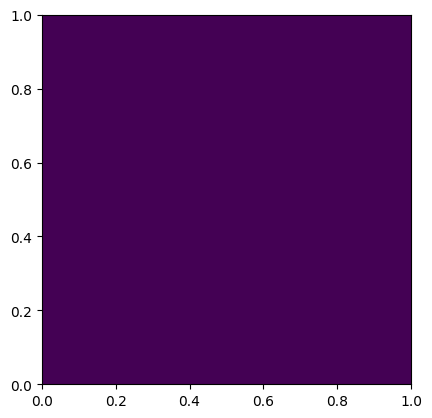

number of epochs = 3
average error = 0.0
  Session 5 : Epochs= 3 Weights= [0.0815893  0.42941127 0.08035622]


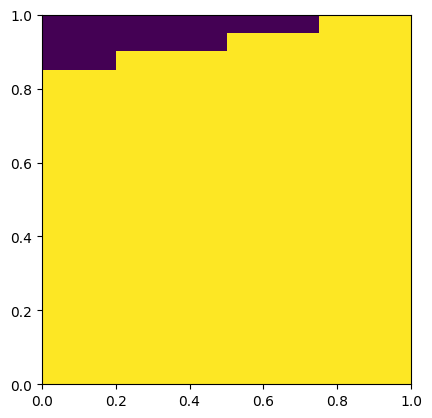

Function: XOR
number of epochs = 100
average error = 0.5
  Session 1 : Epochs= 100 Weights= [-0.08063822 -0.05625815  0.0454689 ]


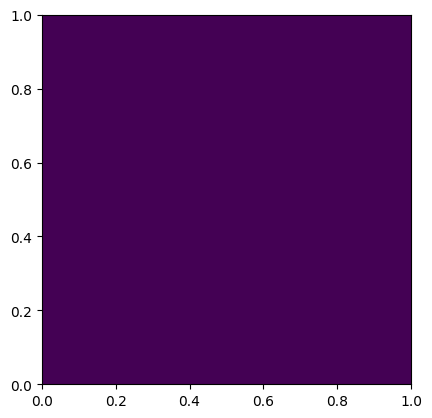

number of epochs = 100
average error = 0.75
  Session 2 : Epochs= 100 Weights= [0.00097985 0.00841966 0.0649554 ]


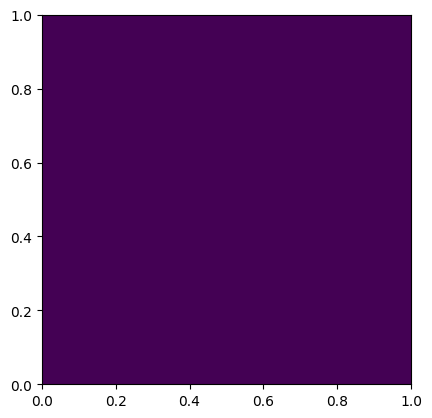

number of epochs = 100
average error = 0.75
  Session 3 : Epochs= 100 Weights= [-0.08069138  0.0251215  -0.06492036]


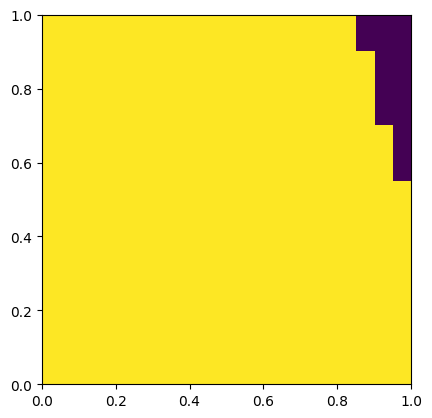

number of epochs = 100
average error = 0.75
  Session 4 : Epochs= 100 Weights= [-0.02415556 -0.01565606 -0.1806237 ]


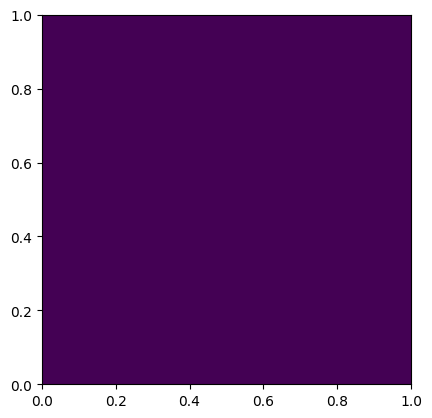

number of epochs = 100
average error = 0.75
  Session 5 : Epochs= 100 Weights= [-0.04322493 -0.07951706 -0.04718543]


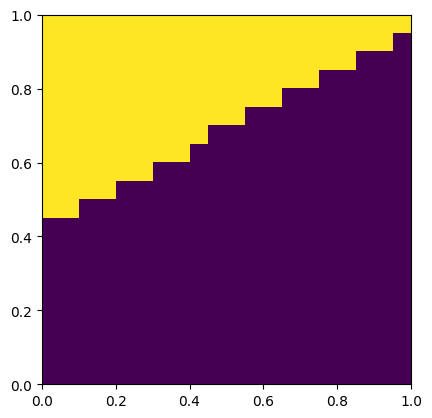

In [ ]:
# Add your test code here, for the homework questions
# Data for AND, OR, XOR
inputs_hw = {
    "AND": np.array([[0, 0], [0, 1], [1, 0], [1, 1]]),
    "OR": np.array([[0, 0], [0, 1], [1, 0], [1, 1]]),
    "XOR": np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
}

targets_hw = {
    "AND": np.array([0, 0, 0, 1]),
    "OR": np.array([0, 1, 1, 1]),
    "XOR": np.array([0, 1, 1, 0])
}

BIAS = -1.0

# Multiple training sessions
# pick any value of num_session that you want to train
num_sessions = 5
for func in ["AND", "OR", "XOR"]:
    print("Function:", func)
    for session in range(1, num_sessions + 1):
        W, epochs = perceptron(inputs_hw[func], targets_hw[func], 0.1, 0.001, 100 if func == "XOR" else 1000)
        print("  Session", session,":", "Epochs=",epochs, "Weights=",W)
        plot_decision_boundary(W)




# Problem 10: Gradient Descent





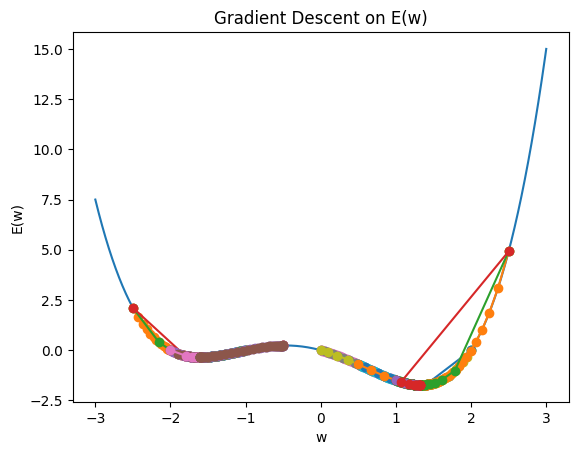

In [6]:
# Implement your program here:
import numpy as np
import matplotlib.pyplot as plt
# Example program. You can modity/extend this.
#
# 1. define error function
# - this is an example (quadratic function) -- you should change it to the function given in the homework.
# - also, you need to check for the termination condition (deltaE in current vs. previous step < 0.001, etc.), rather than using a fixed number of steps.
def E(w):
  '''
  implement this
  '''
  return (1/4)*(w)*(w+2)*(w+1)*(w-2)
  #return np.power(w-2.5,2) + 1      # note: np.power() can take scalar or vector as argument.

# 2. define derivative function
def dEdw(w):
  '''
  implement this
  '''
  return (w**3) + (3/4)*(w**2) - 2*w - 1
  #return 2*(w-2.5)

# 3. gradient descent

#w = 1.3     # initial value
initial_w_values = [-2.5, -2.0, -1.5, -1.0, -0.5, 0, 0.5, 1.0, 1.5, 2.0, 2.5]
#alpha = 0.1   # learning rate  ; try eta=0.01 and eta=0.01
alphas = [0.01, 0.05, 0.1]

#print(dEdw(w))
n = 1000   # Try changing this depending on the alpha value.

w_t = np.zeros(n)   # this is w at step t
Ew_t = np.zeros(n)  # this is E(w) at step t

#error determine coverage
exit_pointer = 0.001

#plot for E(w)
w_values = np.linspace(-3, 3, 400)
plt.plot(w_values, E(w_values), label='E(w)')
'''
  implement this loop : exit when deltaE is < small value (e.g. 0.01)
  - be careful with plotting, since if you terminate early,
    zeros in the w_t[] and Ew_t[] list would lead to a weird plot.
'''
for initial_w in initial_w_values:
  for alpha in alphas:
    w = initial_w
    w_list = [w]
    E_list = [E(w)]
  # implement this: gradient descent step
    for i in range(n):
      #calculate gradient
      delta_w = -alpha * dEdw(w)
      #update w
      w += delta_w
      #show the list of w and E(w)
      w_list.append(w)
      E_list.append(E(w))

      if abs(delta_w) < exit_pointer:
        break
    # 4. plot E(w) and the gradient descent steps
    plt.plot(w_list, E_list, 'o-', label=f'w0={initial_w}, alpha={alpha}')
  #w_t[i]=w
  #Ew_t[i]=E(w)
  # implement this: gradient descent step
  # w = .....

# Note: adjust the range below based on the function you're given in problem 10.
#  - right now the x axis in the plot is 0 to 5 with a step size of 0.1.
#x = np.arange(0,5,0.1)
#plt.plot(x,E(x),"-",w_t,Ew_t,"*-")

plt.title('Gradient Descent on E(w)')
plt.xlabel('w')
plt.ylabel('E(w)')
#use legend to show more info
#plt.legend()
plt.show()


# Problem 11 : CNN

In [9]:
'''

Put your CNN code and results here. Use a separate code cell for the sub tasks.

'''
#https://chat.openai.com/share/2f4306fc-64ce-4a31-93ba-9236ad4a2576

#replace comments for LeNet25 function and write by my own

import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras import datasets, utils
import numpy as np

#define the function for LeNet model
def LeNet25(input_shape=(32, 32, 1), num_classes=10):
    #this line sets the foundation for building the neural network.
    model = models.Sequential()
    #layers.Conv2D: This specifies that the layer being added is a 2D convolutional layer
    #this line is adding first convolutional layer
    model.add(layers.Conv2D(filters=25, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
    #this line adds an average pooling layer to the model
    model.add(layers.AveragePooling2D())

    #this line is adding second convolutional layer
    model.add(layers.Conv2D(filters=25, kernel_size=(5, 5), activation='relu'))
    #this line adds an average pooling layer to the model
    model.add(layers.AveragePooling2D())

    # Flatten is a layer that doesn't have learnable parameters like weights or biases.
    #The Flatten layer takes the output of the preceding layers and flattens it into a long one-dimensional vector.
    model.add(layers.Flatten())

    #adds a first densely-connected layer to the neural network model.
    model.add(layers.Dense(units=120, activation='relu'))

    #adds a second densely-connected layer to the neural network model.
    model.add(layers.Dense(units=84, activation='relu'))

    #adds the final layer to the neural network model, and serve as the output layer for classification tasks
    model.add(layers.Dense(units=num_classes, activation='softmax'))

    return model

# Example of creating the modified LeNet model
lenet25_model = LeNet25(input_shape=(32, 32, 1), num_classes=10)
lenet25_model.summary()

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
x_train = np.pad(x_train, ((0,0),(2,2),(2,2)), 'constant')
x_test = np.pad(x_test, ((0,0),(2,2),(2,2)), 'constant')
x_train = x_train[..., np.newaxis] / 255.0
x_test = x_test[..., np.newaxis] / 255.0
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

# Define the modified LeNet model (as before, with 25 filters in each conv layer)

def train_model(epochs, batch_size=128):
    model = LeNet25()
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(f'Epochs: {epochs}, Test accuracy: {test_acc}')

# Experiment with different numbers of epochs
epoch_values = [5,10]
for epochs in epoch_values:
    train_model(epochs)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 25)        650       
                                                                 
 average_pooling2d_12 (Aver  (None, 14, 14, 25)        0         
 agePooling2D)                                                   
                                                                 
 conv2d_13 (Conv2D)          (None, 10, 10, 25)        15650     
                                                                 
 average_pooling2d_13 (Aver  (None, 5, 5, 25)          0         
 agePooling2D)                                                   
                                                                 
 flatten_6 (Flatten)         (None, 625)               0         
                                                                 
 dense_18 (Dense)            (None, 120)              

Epoch 1/10
469/469 [==============================] - 36s 75ms/step - loss: 0.2907 - accuracy: 0.9144 - val_loss: 0.0860 - val_accuracy: 0.9736
Epoch 2/10
469/469 [==============================] - 34s 73ms/step - loss: 0.0790 - accuracy: 0.9758 - val_loss: 0.0499 - val_accuracy: 0.9835
Epoch 3/10
469/469 [==============================] - 35s 75ms/step - loss: 0.0559 - accuracy: 0.9826 - val_loss: 0.0501 - val_accuracy: 0.9828
Epoch 4/10
469/469 [==============================] - 35s 76ms/step - loss: 0.0448 - accuracy: 0.9860 - val_loss: 0.0343 - val_accuracy: 0.9886
Epoch 5/10
469/469 [==============================] - 35s 75ms/step - loss: 0.0345 - accuracy: 0.9894 - val_loss: 0.0361 - val_accuracy: 0.9890
Epoch 6/10
469/469 [==============================] - 35s 75ms/step - loss: 0.0310 - accuracy: 0.9897 - val_loss: 0.0353 - val_accuracy: 0.9883
Epoch 7/10
469/469 [==============================] - 35s 76ms/step - loss: 0.0268 - accuracy: 0.9916 - val_loss: 0.0303 - val_accuracy:

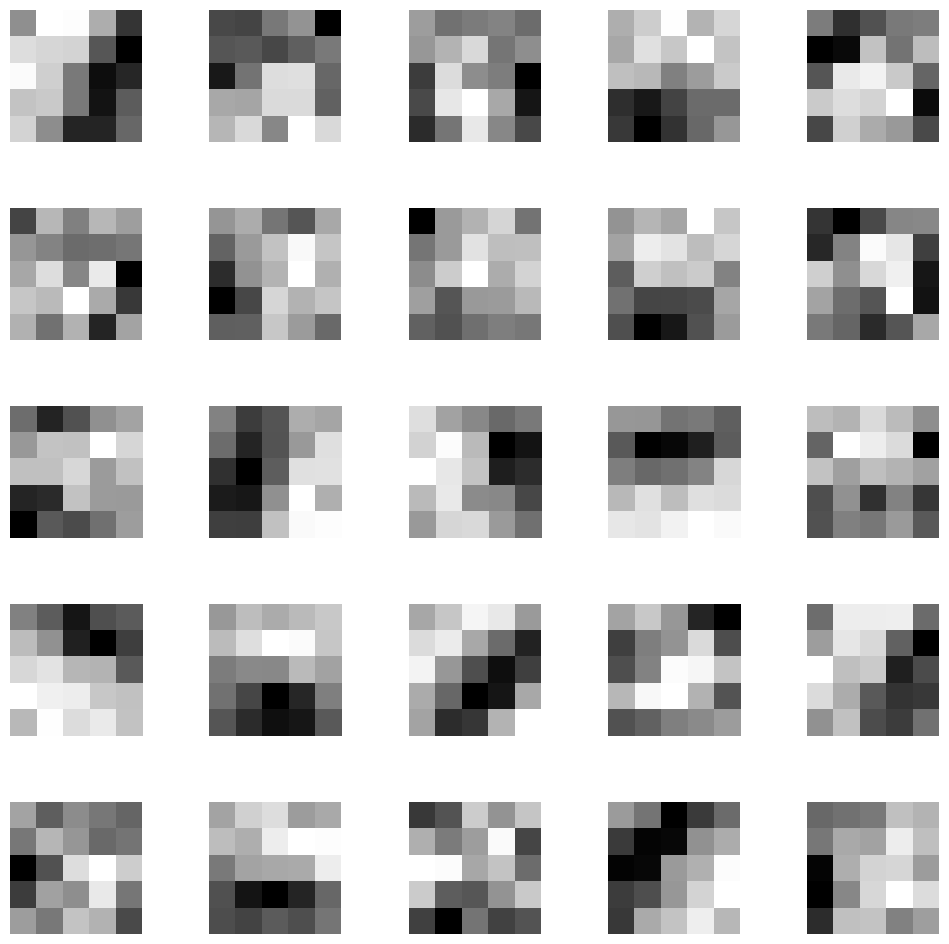

In [10]:
import matplotlib.pyplot as plt
import tensorflow as tf

# Assuming you have already defined and trained your LeNet model
# Replace 'lenet_model' with the name of your trained model
lenet_model = LeNet25()
lenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
lenet_model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))


# Extract the weights of the first convolutional layer
first_conv_layer = lenet_model.layers[0]
filters, biases = first_conv_layer.get_weights()

# Normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

# Number of filters in the first convolutional layer
n_filters = 25

# Plotting the filters in a 5x5 grid
fig, axes = plt.subplots(5, 5, figsize=(12, 12))

for i in range(n_filters):
    # Get the filter
    filt = filters[:, :, 0, i]  # Assuming grayscale images, so we use the first channel
    row = i // 5
    col = i % 5

    # Plot the filter
    axes[row, col].imshow(filt, cmap='gray')
    axes[row, col].axis('off')

# Adjust layout and display the figure
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()


1/1 [==============================] - 0s 61ms/step


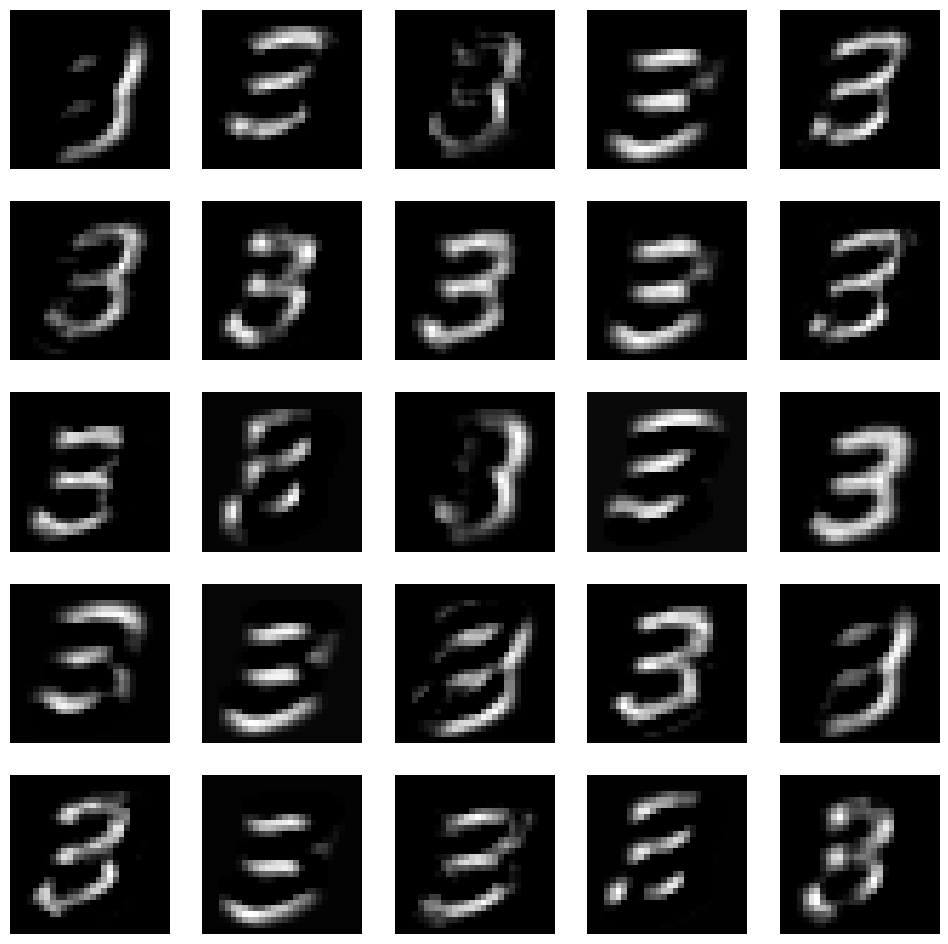

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, models

# Load the MNIST dataset
(x_train, y_train), _ = datasets.mnist.load_data()

# Preprocess the data
x_train = np.pad(x_train, ((0,0),(2,2),(2,2)), 'constant')
x_train = x_train[..., np.newaxis] / 255.0

# Find an image of a "3"
idx = np.where(y_train == 3)[0][0]  # Change 0 to another number to select a different image of "3"
img = x_train[idx]

# Assuming lenet_model is your trained LeNet model
# Create a model to visualize the first convolutional layer outputs
layer_outputs = [lenet_model.layers[0].output]
visualization_model = models.Model(inputs=lenet_model.input, outputs=layer_outputs)

# Get the feature maps
feature_maps = visualization_model.predict(img[np.newaxis, ...])

# Plot the feature maps
n_features = feature_maps.shape[-1]  # Number of features in the feature map
fig, axes = plt.subplots(5, 5, figsize=(12, 12))  # Adjust the subplot grid if needed

for i in range(n_features):
    ax = axes[i // 5, i % 5]
    ax.imshow(feature_maps[0, :, :, i], cmap='gray')
    ax.axis('off')

plt.show()
